In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 25

In [4]:
# reading the train and test datasets
train_df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv', index_col = 0)
test_df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv', index_col = 0)

In [5]:
# getting brief overview of the train dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, 
# how many non-null values it has 
# and memory usage
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
# getting brief overview of the test dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, 
# how many non-null values it has 
# and memory usage
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [7]:
# getting all the columns name of the train dataset
train_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
# changing the column name as per Python naming convention
train_df.rename(columns = {'Gender' : 'gender', 'Customer Type': 'customer_type', 'Age' : 'age', 
                           'Type of Travel': 'travel_type', 'Class': 'class', 
                           'Flight Distance': 'flight_distance', 
                           'Inflight wifi service': 'inflight_wifi',
                           'Departure/Arrival time convenient': 'departure_n_arrival_time_convenient', 
                           'Ease of Online booking' : 'easy_onlinebooking',
                           'Gate location' : 'gate_location', 'Food and drink' : 'food_n_drink', 
                           'Online boarding' : 'online_boarding', 'Seat comfort': 'seat_comfort',
                           'Inflight entertainment' : 'inflight_entertainment', 
                           'On-board service' : 'onboard_service', 
                           'Leg room service' : 'leg_room_service',
                           'Baggage handling' : 'baggage_handling',
                           'Checkin service' : 'checkin_service', 
                           'Inflight service' : 'inflight_service','Cleanliness' : 'cleanliness',
                           'Departure Delay in Minutes': 'departure_delay_min', 
                           'Arrival Delay in Minutes' : 'arrival_delay_minutes',
                           'satisfaction' : 'satisfaction'}, inplace= True)

In [9]:
# changing the column name as per Python naming convention
test_df.rename(columns = {'Gender' : 'gender', 'Customer Type': 'customer_type', 'Age' : 'age', 
                           'Type of Travel': 'travel_type', 'Class': 'class', 
                           'Flight Distance': 'flight_distance', 
                           'Inflight wifi service': 'inflight_wifi',
                           'Departure/Arrival time convenient': 'departure_n_arrival_time_convenient', 
                           'Ease of Online booking' : 'easy_onlinebooking',
                           'Gate location' : 'gate_location', 'Food and drink' : 'food_n_drink', 
                           'Online boarding' : 'online_boarding', 'Seat comfort': 'seat_comfort',
                           'Inflight entertainment' : 'inflight_entertainment', 
                           'On-board service' : 'onboard_service', 
                           'Leg room service' : 'leg_room_service',
                           'Baggage handling' : 'baggage_handling',
                           'Checkin service' : 'checkin_service', 
                           'Inflight service' : 'inflight_service','Cleanliness' : 'cleanliness',
                           'Departure Delay in Minutes': 'departure_delay_min', 
                           'Arrival Delay in Minutes' : 'arrival_delay_minutes',
                           'satisfaction' : 'satisfaction'}, inplace= True)

In [10]:
# first 5 rows content of the train dataset
train_df.head()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
# first 5 rows content of the test dataset
test_df.head()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
# shape of the dataset
train_df.shape, test_df.shape

((103904, 24), (25976, 24))

In [13]:
# checking for any duplicate records
train_df.duplicated().sum()

0

In [14]:
round(train_df['satisfaction'].value_counts(normalize = True) * 100, 2)

neutral or dissatisfied    56.67
satisfied                  43.33
Name: satisfaction, dtype: float64

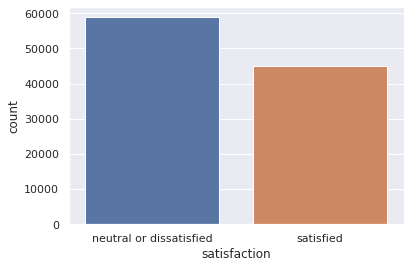

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'satisfaction', data = train_df)
plt.show()

#### converting object dtype columns to numeric dtype

In [16]:
# getting all object dtype column name

colname = list(train_df.select_dtypes(['object']).columns)
colname

['gender', 'customer_type', 'travel_type', 'class', 'satisfaction']

#### checking whether the train and test dataset object column have same unique values

In [17]:
# finding the unique values count
train_df['gender'].value_counts()

Female    52727
Male      51177
Name: gender, dtype: int64

In [18]:
train_df['gender'].value_counts().sort_index().index.tolist() == test_df['gender'].value_counts().sort_index().index.tolist()

True

In [19]:
train_df['customer_type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: customer_type, dtype: int64

In [20]:
train_df['customer_type'].value_counts().sort_index().index.tolist() == test_df['customer_type'].value_counts().sort_index().index.tolist()

True

In [21]:
train_df['travel_type'].value_counts()

Business travel    71655
Personal Travel    32249
Name: travel_type, dtype: int64

In [22]:
train_df['travel_type'].value_counts().sort_index().index.tolist() == test_df['travel_type'].value_counts().sort_index().index.tolist()

True

In [23]:
train_df['class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: class, dtype: int64

In [24]:
train_df['class'].value_counts().sort_index().index.tolist() == test_df['class'].value_counts().sort_index().index.tolist()

True

In [25]:
train_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [26]:
train_df['satisfaction'].value_counts().sort_index().index.tolist() == test_df['satisfaction'].value_counts().sort_index().index.tolist()

True

#### Finding the unique values and also checking whether the unique values are same in train and test dataset. As while converting object dtype to numeric dtype if both the train and test dataset doesn't have same unique values it will create a discrepancy in these columns values which may affect the prediction results of the model. Though these dataset has same unique values in each of the object dtype columns in both train and test, then though it is always ideal to combine both train and test to perform the conversion of object dtype to numeric dtype and later again separated train and test dataset

In [27]:
train_df['training_set'] = 1
test_df['training_set'] = 0
frame = [train_df, test_df]
temp_df = pd.concat(frame)
temp_df.reset_index(drop = True, inplace= True)

In [28]:
temp_df['gender'] = temp_df['gender'].astype('category').cat.codes
temp_df['customer_type'] = temp_df['customer_type'].astype('category').cat.codes
temp_df['travel_type'] = temp_df['travel_type'].astype('category').cat.codes
temp_df['class'] = temp_df['class'].astype('category').cat.codes
temp_df['satisfaction'] = temp_df['satisfaction'].astype('category').cat.codes

In [29]:
train_df = temp_df[temp_df['training_set'] == 1]
train_df.drop(['training_set'], axis = 1, inplace = True)
train_df.reset_index(drop = True, inplace = True)

In [30]:
test_df = temp_df[temp_df['training_set'] == 0]
test_df.drop(['training_set'], axis = 1, inplace =True)
test_df.reset_index(drop = True, inplace= True)

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   103904 non-null  int64  
 1   gender                               103904 non-null  int8   
 2   customer_type                        103904 non-null  int8   
 3   age                                  103904 non-null  int64  
 4   travel_type                          103904 non-null  int8   
 5   class                                103904 non-null  int8   
 6   flight_distance                      103904 non-null  int64  
 7   inflight_wifi                        103904 non-null  int64  
 8   departure_n_arrival_time_convenient  103904 non-null  int64  
 9   easy_onlinebooking                   103904 non-null  int64  
 10  gate_location                        103904 non-null  int64  
 11  food_n_drink 

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   25976 non-null  int64  
 1   gender                               25976 non-null  int8   
 2   customer_type                        25976 non-null  int8   
 3   age                                  25976 non-null  int64  
 4   travel_type                          25976 non-null  int8   
 5   class                                25976 non-null  int8   
 6   flight_distance                      25976 non-null  int64  
 7   inflight_wifi                        25976 non-null  int64  
 8   departure_n_arrival_time_convenient  25976 non-null  int64  
 9   easy_onlinebooking                   25976 non-null  int64  
 10  gate_location                        25976 non-null  int64  
 11  food_n_drink                

In [33]:
# basic statistical details
train_df.describe()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,64924.210502,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [34]:
# dropping the id column as it is not an important independent variable 
# for training the model and getting the prediction
train_df.drop(['id'], axis = 1, inplace = True)
test_df.drop(['id'], axis = 1, inplace = True)

In [35]:
# normalizing the data with MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

In [36]:
# independent variables name
input_colname = list(train_df.columns)
input_colname.remove('satisfaction')
input_colname

['gender',
 'customer_type',
 'age',
 'travel_type',
 'class',
 'flight_distance',
 'inflight_wifi',
 'departure_n_arrival_time_convenient',
 'easy_onlinebooking',
 'gate_location',
 'food_n_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_min',
 'arrival_delay_minutes']

In [37]:
minmaxtrain_df = train_df.copy()
minmaxtrain_df.drop(['satisfaction'], axis = 1, inplace = True)

minmax_scaler = MinMaxScaler()
minmaxtrain_df = minmax_scaler.fit_transform(minmaxtrain_df)
minmaxtrain_df = pd.DataFrame(minmaxtrain_df, columns = input_colname)
minmaxtrain_df['satisfaction'] = train_df['satisfaction']
minmaxtrain_df.head()

,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1


In [38]:
minmaxtest_df = test_df.copy()
minmaxtest_df.drop(['satisfaction'], axis = 1, inplace = True)
minmaxtest_df = minmax_scaler.transform(minmaxtest_df)
minmaxtest_df = pd.DataFrame(minmaxtest_df, columns = input_colname)
minmaxtest_df['satisfaction'] = test_df['satisfaction']
minmaxtest_df.head()

,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes,satisfaction
0,0.0,0.0,0.576923,0.0,0.5,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778,1
1,0.0,0.0,0.371795,0.0,0.0,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000,1
2,1.0,1.0,0.166667,0.0,0.5,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000,0
3,1.0,0.0,0.474359,0.0,0.0,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788,1
4,0.0,0.0,0.538462,0.0,0.5,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626,1


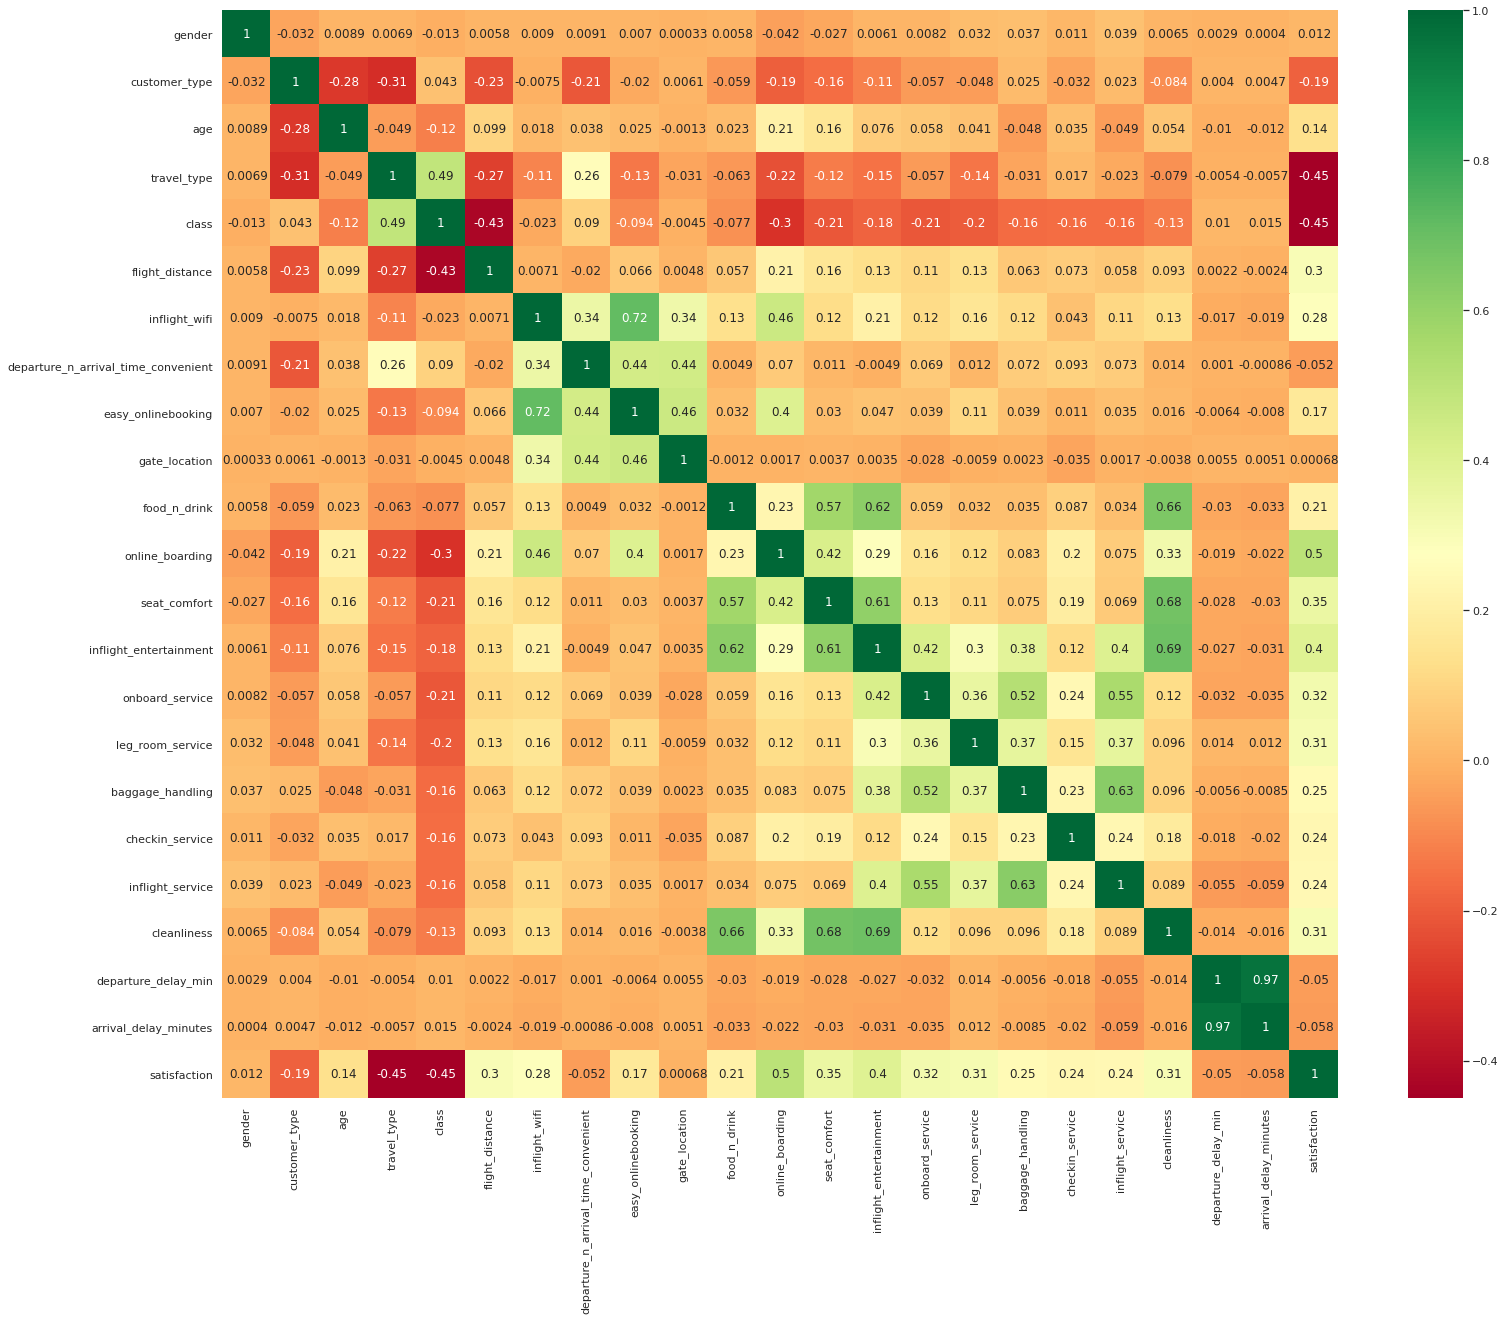

In [39]:
#finding the correlation between all the variables in a dataset

feature_corr = minmaxtrain_df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(feature_corr, annot = True, cmap = 'RdYlGn')
plt.show()

In [40]:
#finding the mean relationship of independent variables with the dependent variable
minmaxtrain_df.groupby('satisfaction').mean()

,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi,departure_n_arrival_time_convenient,easy_onlinebooking,gate_location,food_n_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_min,arrival_delay_minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,,
0,0.487203,0.246081,0.391881,0.492026,0.419029,0.181325,0.479927,0.625822,0.509370,0.595224,0.591610,0.531225,0.607259,0.578831,0.603832,0.598162,0.593998,0.608590,0.677763,0.587225,0.010367,0.010813
1,0.499522,0.099767,0.445520,0.072826,0.137579,0.302734,0.632258,0.594061,0.606316,0.595576,0.704262,0.805495,0.793306,0.792986,0.771465,0.764429,0.741599,0.729208,0.793892,0.748868,0.007920,0.007974


In [41]:
#initializing the X (independent variables) and y (dependent variable)

X = minmaxtrain_df.drop(['satisfaction'], axis = 1)
y = minmaxtrain_df['satisfaction']

In [42]:
X_test = minmaxtest_df.drop(['satisfaction'], axis = 1)
y_test = minmaxtest_df['satisfaction']

In [43]:
# training XGBClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
xgbc_model = XGBClassifier(objective = 'binary:logistic', random_state = 42)

In [45]:
parameters = {
    'max_depth' : [8],
    'n_estimators' : [500],
    'learning_rate': [0.01]
}

In [46]:
gs = GridSearchCV(
    estimator = xgbc_model,
    param_grid = parameters,    
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [47]:
gs.fit(X,y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[07:47:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [48]:
pred = gs.predict(X_test)

In [49]:
# model score
gs.score(X_test, y_test)

0.9607714813674161

In [50]:
#getting confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 10729
True Negative 14228
False Positive 345
False Negative 674


In [51]:
accuracy_score(y_test, pred)

0.9607714813674161

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

